## Notizen
https://de.mathworks.com/help/signal/ug/measuring-signal-similarities.html

https://makeabilitylab.github.io/physcomp/signals/ComparingSignals/index.html

In [202]:
import numpy
from main import *
import os
import matplotlib.pyplot as plt
import IPython


# Signale im Zeitbereich

File ..\viblib\v-09-10-6-46.wav exists.
File ..\viblib\test\v-09-10-6-46.wav exists.
Original um  1 samples gekürzt


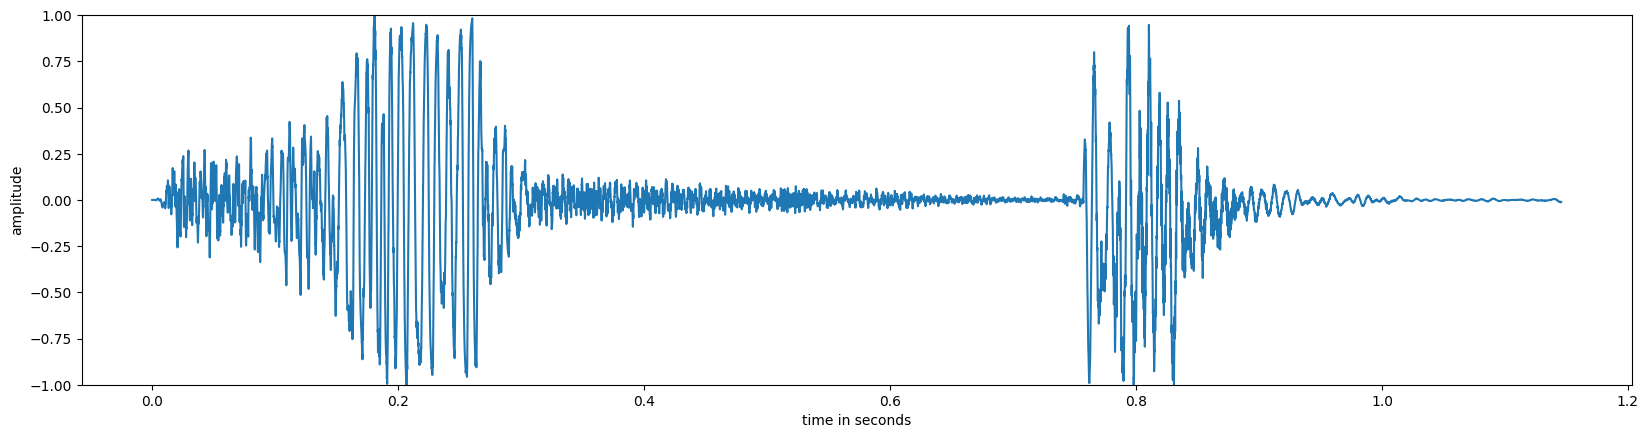

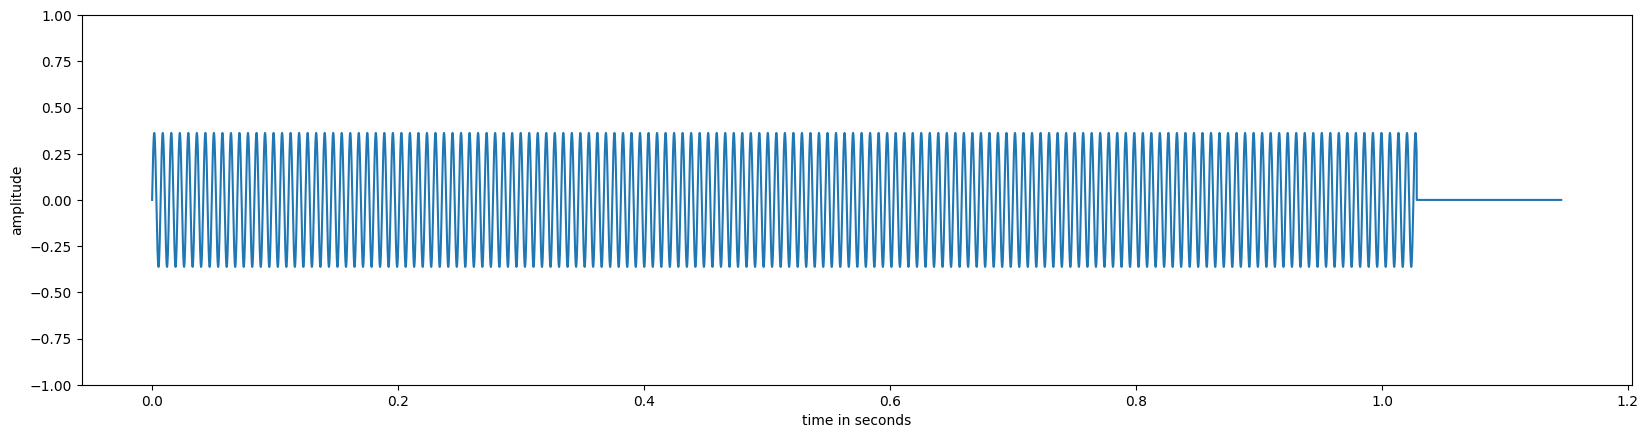

In [203]:
name = "v-09-10-6-46"
originalFilePath = "..\\viblib\\" + name + ".wav"
convertedFilePath = "..\\viblib\\test\\" + name + ".wav"



original, _=openFile(originalFilePath)
converted, sr=openFile(convertedFilePath)


if(len(original)> len(converted)):
    print("Original um ", len(original)-len(converted), "samples gekürzt")
    original = original[:len(converted)]

elif(len(original)< len(converted)):
    print("Converted um ", len(converted)-len(original), "samples gekürzt")
    converted = converted[:len(original)]


times = numpy.arange(0,len(original)/sr,1/sr)



plt.figure().set_figwidth(20)
plt.plot(times,original)
plt.xlabel("time in seconds")
plt.ylabel("amplitude")
plt.ylim([-1,1])



times = numpy.arange(0,len(converted)/sr,1/sr)
plt.figure().set_figwidth(20)
plt.xlabel("time in seconds")
plt.ylabel("amplitude")
plt.plot(times,converted)
plt.ylim([-1,1])
IPython.display.display(IPython.display.Audio(originalFilePath))
IPython.display.display(IPython.display.Audio(convertedFilePath))

# Vergleich der Frequenzen

Text(0.5, 1.0, 'converted')

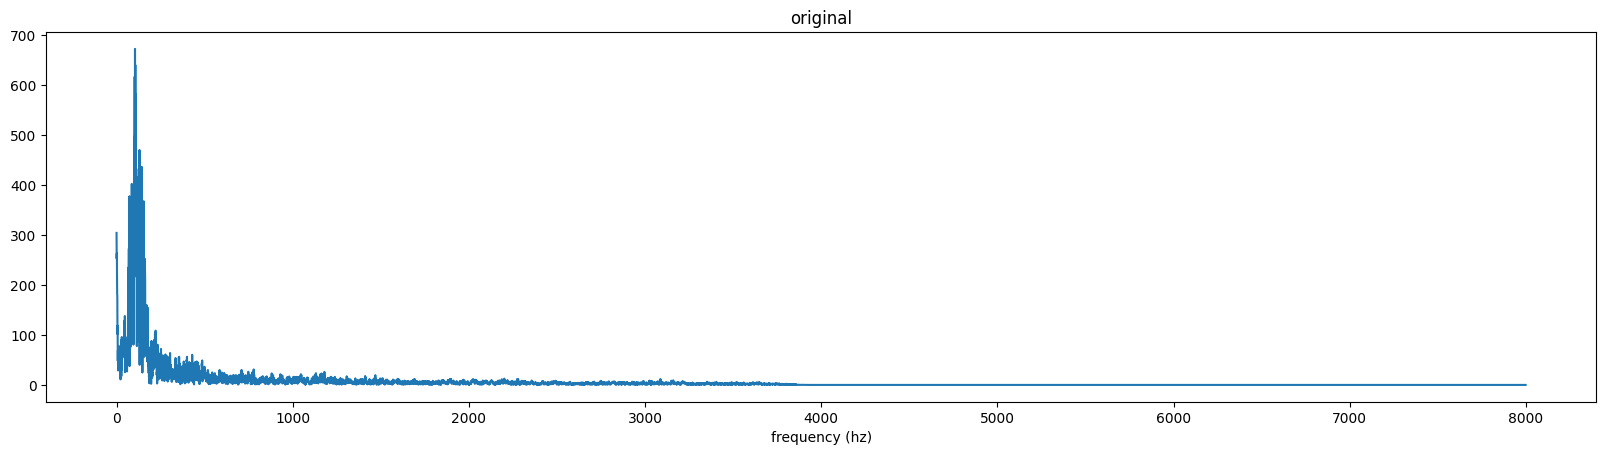

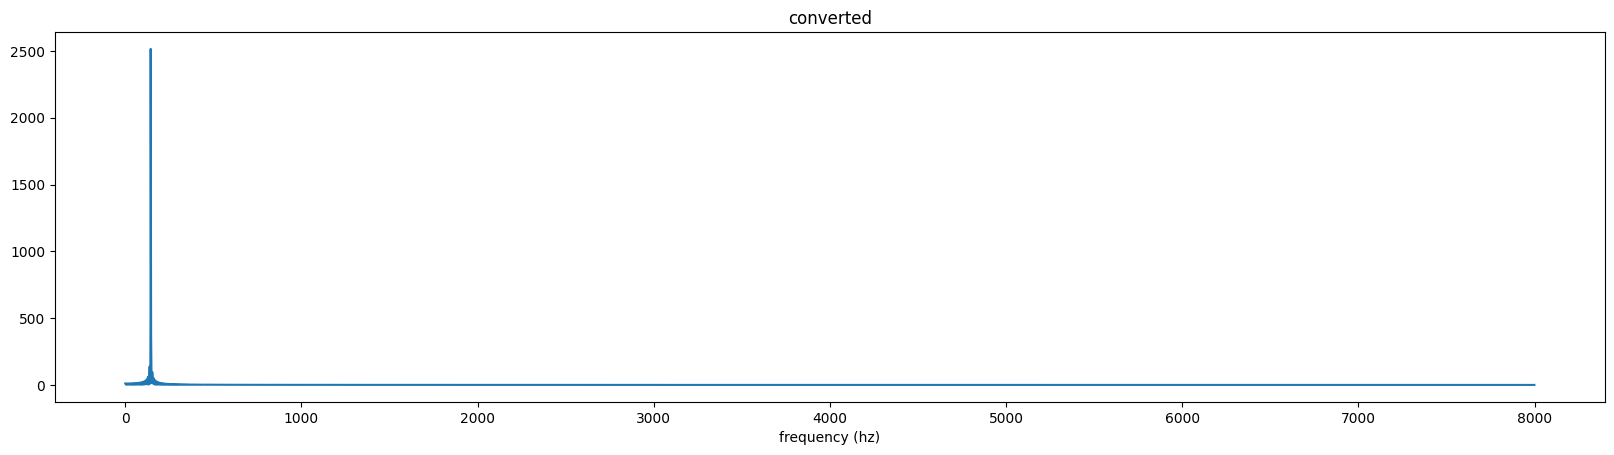

In [204]:


import scipy.fft



original_fft=scipy.fft.fft(original)
converted_fft=scipy.fft.fft(converted)

frequencies = numpy.fft.fftfreq(n=len(original), d=1/sr)
original_fft = original_fft[:len(original_fft)//2]
original_fft = abs(original_fft)


converted_fft = converted_fft[:len(converted_fft)//2]
converted_fft = abs(converted_fft)

frequencies = frequencies[:len(frequencies)//2]

plt.figure().set_figwidth(20)
#plt.xscale("log")
plt.plot(frequencies,original_fft)
plt.xlabel("frequency (hz)")
plt.title("original")
plt.figure().set_figwidth(20)
#plt.xscale("log")
plt.plot(frequencies,converted_fft)
plt.xlabel("frequency (hz)")
plt.title("converted")

## Abweichung der durchscnittlichen Frequenz

Text(0.5, 1.0, 'Error')

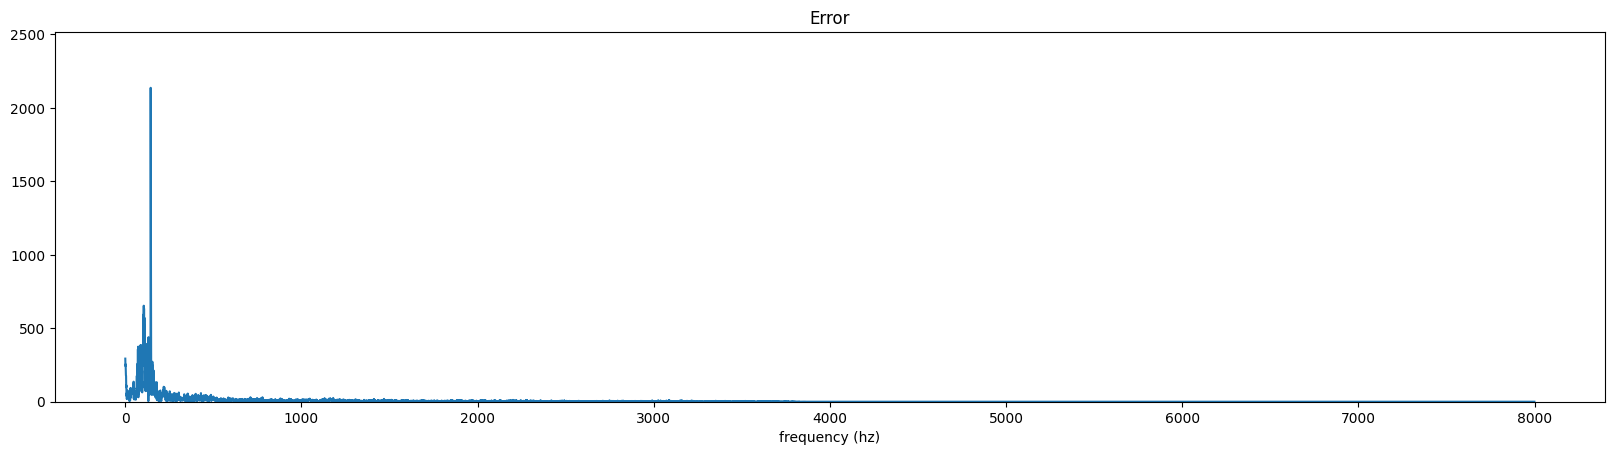

In [205]:
Error = abs(original_fft-converted_fft)
plt.figure().set_figwidth(20)
plt.ylim([0, max([max(original_fft),max(converted_fft)])])
#plt.xscale("log")
plt.plot(frequencies,Error)
plt.xlabel("frequency (hz)")
plt.title("Error")


In [206]:
#frequenz mitteln
original_mean = sum(numpy.multiply(frequencies, original_fft)) / sum(original_fft)
print(original_mean)

converted_mean = sum(numpy.multiply(frequencies, converted_fft)) / sum(converted_fft)
print(converted_mean)

freqnce_diff = abs(original_mean - converted_mean)
print(freqnce_diff)


#mittlere Abweichung

meanDistance = numpy.mean(Error[:1000])
print("Durschschnittlicher Fehler 0Hz bis 1000Hz:", meanDistance)

592.0206182739078
585.5722284684896
6.448389805418174
Durschschnittlicher Fehler 0Hz bis 1000Hz: 49.59927


# (Amplituden) Leistung

Durschschnittliche Abweichung 0.19072978


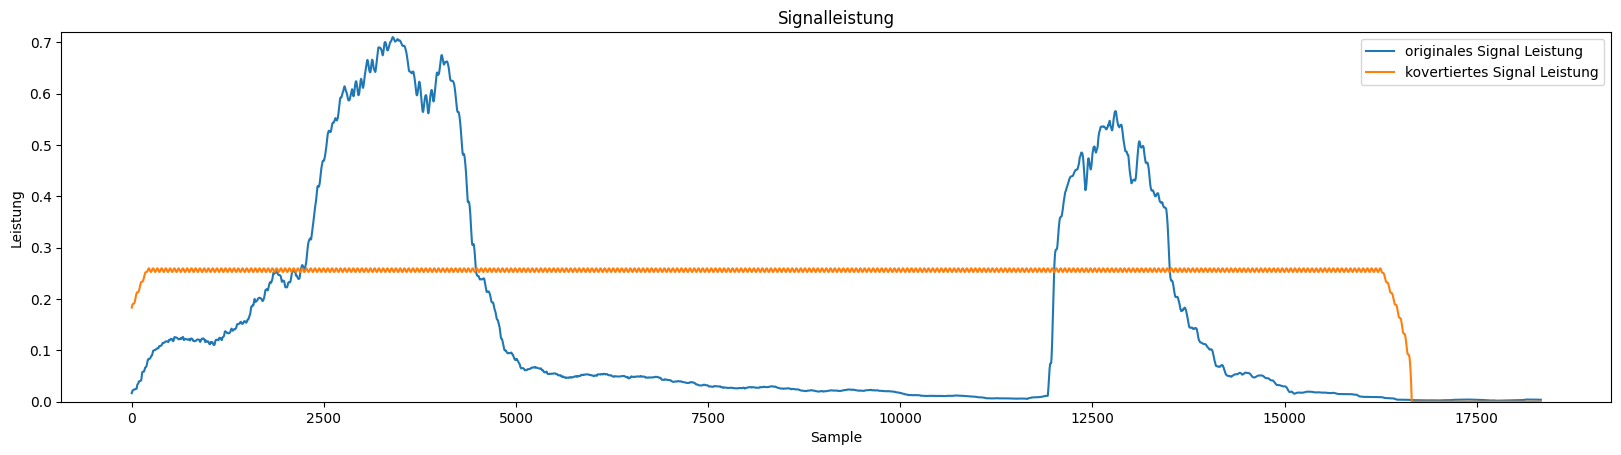

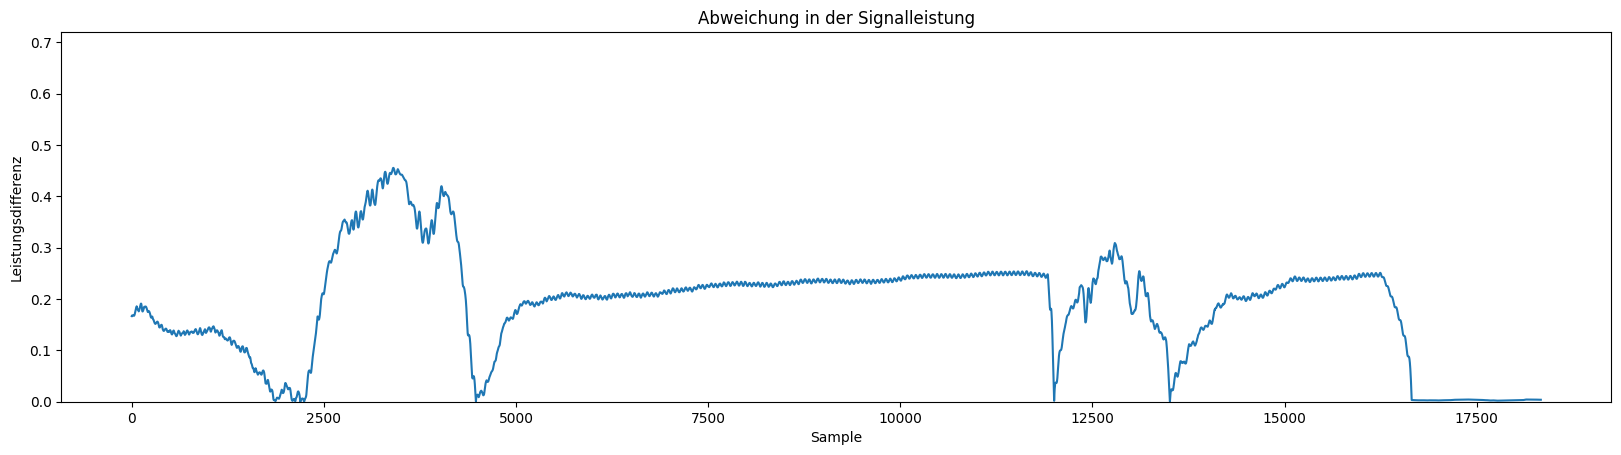

In [207]:
from librosa.feature import rms


frame_length = sr//40


PlotInterminResults(False)
original_power = librosa.feature.rms(y=original,frame_length=frame_length, hop_length=1)
converted_power = librosa.feature.rms(y=converted,frame_length=frame_length, hop_length=1)

diff_power = [abs(op - cp) for op, cp in zip(original_power[0], converted_power[0])]

plt.figure().set_figwidth(20)
plt.title("Signalleistung")
plt.ylim(0,0.72)
plt.plot(original_power[0],label="originales Signal Leistung")
plt.plot(converted_power[0],label="kovertiertes Signal Leistung")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Leistung")

plt.figure().set_figwidth(20)
plt.title("Abweichung in der Signalleistung")
plt.ylim(0,0.72)
plt.plot(diff_power)
plt.xlabel("Sample")
plt.ylabel("Leistungsdifferenz")


meanDistance_power = numpy.mean(diff_power)

print("Durschschnittliche Abweichung", meanDistance_power) 


# Unterschied der Signalleistung

In [208]:

ref_power = numpy.sum(original**2)/(sr/1000) #mW/L L - Faktor für Lautstärke 
inp_power = numpy.sum(converted**2)/(sr/1000) #mW/L L - Faktor für Lautstärke 
diff_power = abs(ref_power-inp_power)

print(diff_power)

6.537559509277344


# Experimente

# Korrelation



In [209]:
import librosa
import scipy.signal
signal_corr =scipy.signal.correlate(original,converted)
print("Zeitsignal Korrelation: ", signal_corr)

frequency_corr = scipy.signal.correlate(original_fft,converted_fft)
corr_test = numpy.correlate(original,original)
print(corr_test)

Zeitsignal Korrelation:  [ 1.0172526e-05  0.0000000e+00 -5.0862632e-06 ... -7.1567961e-04
 -2.2358364e-04  4.2385525e-07]
[1186.2299]


## Amplituden vergleich

Durchschnittliche Abweichung: 31.410232085125244 %


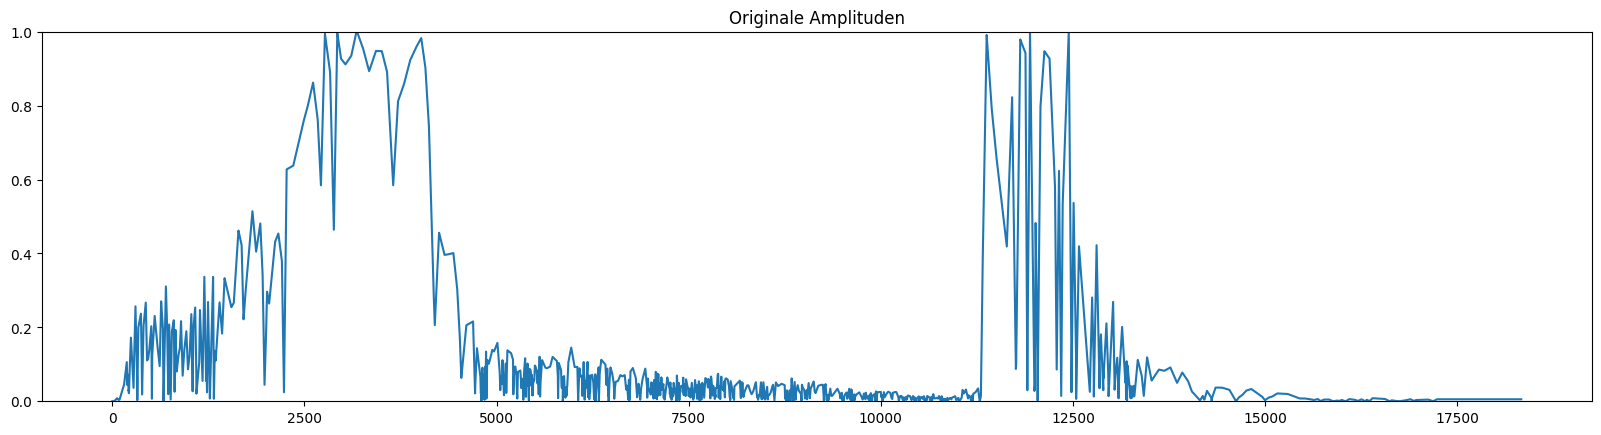

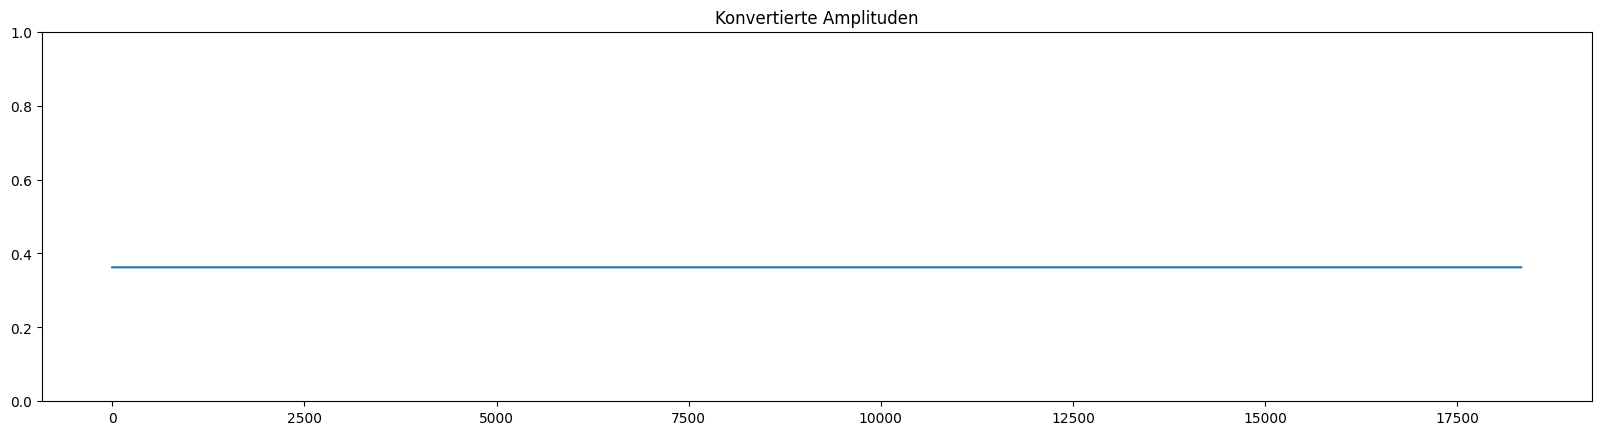

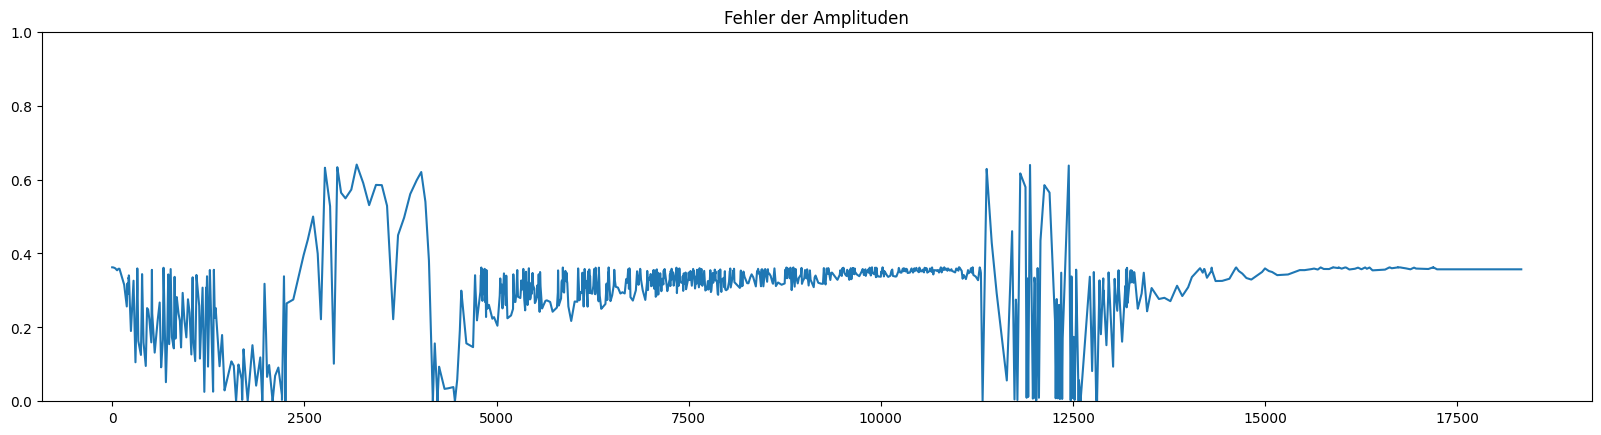

In [210]:
original_amp=getAmplitudes(original, sr)
original_amp=interpolate(original_amp, len(original))

converted_amp=getAmplitudes(converted, sr)
converted_amp=interpolate(converted_amp, len(converted))



diff_amp = abs(original_amp-converted_amp)

meanDistance = numpy.mean(diff_amp)
print("Durchschnittliche Abweichung:", meanDistance * 100, "%")

plt.figure().set_figwidth(20)
plt.title("Originale Amplituden")
plt.ylim([0,1])
plt.plot(original_amp)
plt.figure().set_figwidth(20)
plt.title("Konvertierte Amplituden")
plt.ylim([0,1])
plt.plot(converted_amp)
plt.figure().set_figwidth(20)
plt.title("Fehler der Amplituden")
plt.ylim([0,1])
plt.plot(diff_amp)

## Frequenzdichte vergleich

134.28499001641106
144.05633111541985


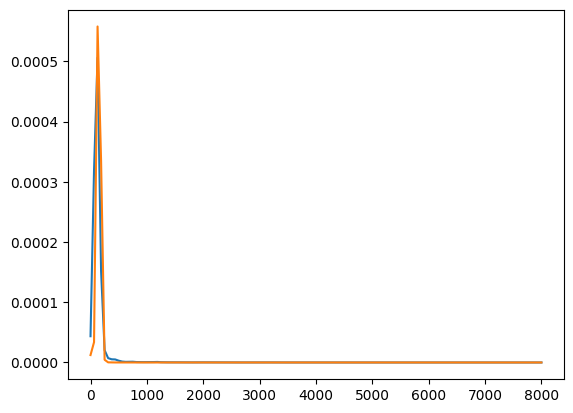

In [211]:
f_org, psd_org = scipy.signal.welch(original, sr)

f_conv, psd_conv = scipy.signal.welch(converted, sr)
plt.plot(f_org, psd_org)
plt.plot(f_conv, psd_conv)

meanWelch_org = sum(numpy.multiply(f_org, psd_org)) / sum(psd_org)
print(meanWelch_org)
meanWelch_conv = sum(numpy.multiply(f_conv, psd_conv)) / sum(psd_conv)
print(meanWelch_conv)

## Komplexität

In [213]:
from scipy.stats import entropy

variance_sinusoidal = numpy.var(original)
variance_noisy = numpy.var(converted)

print("Varianz der Sinuswelle:", variance_sinusoidal)
print("Varianz des verrauschten Signals:", variance_noisy)

Varianz der Sinuswelle: 0.06442882
Varianz des verrauschten Signals: 0.05899866
